In [1]:
#OM NAMO NARAYANA
from scipy.stats import norm
from math import erf, sqrt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print('For 95% confidence level, z={}\nFor 99% confidence level, z={}'.format(-norm.ppf(0.025), -norm.ppf(0.005)))

For 95% confidence level, z=1.9599639845400545
For 99% confidence level, z=2.575829303548901


## erf function
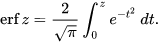
### Interpretation
For a random variable Y that is normally distributed with mean 0 and variance 1/2, erf x is the probability that Y falls in the range [−x, x]. Hence, for unit variance we use erf(x/sqrt(2))

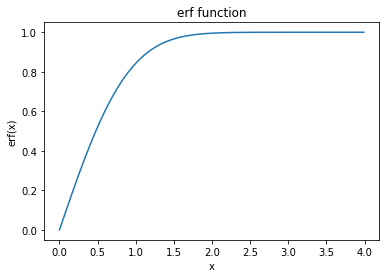

In [3]:
x = np.arange(0, 400)/100;
y = [erf(i) for i in x];
plt.title('erf function')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.plot(x, y);

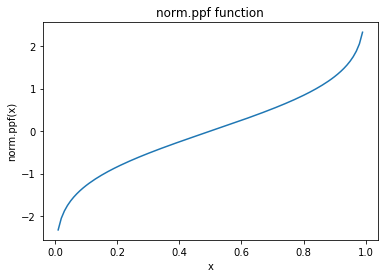

In [4]:
x = np.arange(0, 400)/100;
y = [norm.ppf(i) for i in x];
plt.title('norm.ppf function')
plt.xlabel('x')
plt.ylabel('norm.ppf(x)')
plt.plot(x, y);

In [5]:
#The test statistic for this hypothesis test is calculated to be 1.73. 
#Then, what is the p-value? 
zx = 1.73
upper_tail = 0.5 - erf(zx/sqrt(2))/2
p = 2*upper_tail
print(f'upper tail area: {upper_tail} p value : {p}')

upper tail area: 0.041815137613594955 p value : 0.08363027522718991


In [6]:
#A  95% confidence interval for the average waiting time at an emergency room is (128 minutes, 147 minutes). 
#Which of the following is false?
alpha = 0.05
x_bar = (128 + 147)/2
SE = ((147-128)/2)/1.96

print(f'x_bar: {x_bar} SE:{SE}')

#for 90% confidence level
x = norm.ppf(0.05)#x for which P(z<=x)=0.05
#P(z>=-x)=P(z<=x) => P(-x<=z<=x)=P(z>=-x)+P(z<=x)=0.1
print(f'90% confidence interval of z:{x, -x}')

x_low = x_bar + x*SE
x_high = x_bar - x*SE
print(f'confidence interval for 90% confidence level : ({x_low}, {x_high})')


# A hypothesis test of HA : μ ≠ 120 min at α = 0.05 is equivalent to this CI.
# null hypothesis H0 : μ = 120 at α = 0.05. 2*P(x_bar>=137.5/H0) = ?
z = (137.5-120)/SE
print(f'P(x_bar <= {2*120-x_bar} or x_bar>={x_bar} /H0):{1-erf(z/sqrt(2))}')


# Equivalent null Hypothesis H0 will be true if the absolute difference between the original mean
# and the observed mean is within 2 confidence intervals
# This implies this is equivalent to null hypothesis H0: μ = 128 or HA: μ ≠ 128 for α = 0.05 or μ > 128 for α = 0.025

x_bar: 137.5 SE:4.846938775510204
90% confidence interval of z:(-1.6448536269514729, 1.6448536269514729)
confidence interval for 90% confidence level : (129.52749517549032, 145.47250482450968)
P(x_bar <= 102.5 or x_bar>=137.5 /H0):0.00030557629425409516


In [7]:
mean = 1100
sd = 200
x1 = 700
x2 = 1500
z1 = (x1-mean)/sd
z2 = (x2-mean)/sd
p1 = erf(z1/sqrt(2))/2
p2 = erf(z2/sqrt(2))/2
print(f'Probability of score between {x1} and {x2} is {p2-p1}')

Probability of score between 700 and 1500 is 0.9544997361036417


In [75]:
from scipy.stats import t
import math

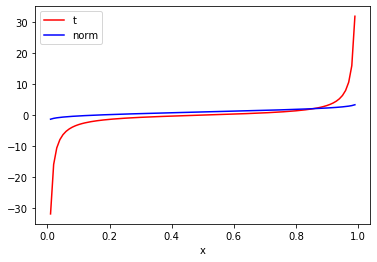

In [20]:
x = np.arange(0, 800)/100;
y = [t.ppf(i, 1) for i in x];
plt.xlabel('x')
# plt.ylabel('')
y2 = [norm.ppf(i, 1) for i in x]
plt.plot(x, y, color='red', label='t')
plt.plot(x, y2, color='blue', label='norm')
plt.legend(['t', 'norm'])
plt.show()

In [25]:
#for 95% confidence interval and 1 degree of freedom and n=22
t_star = t.ppf(0.025, 21)
print(f'for 95% confidence level and 1 degree of freedom, the t-value is {t_star}')

for 90% confidence level and 1 degree of freedom, the t-value is -2.0796138447276626


In [29]:
# Suppose the suggested serving size of these biscuits is 30 g. 
# Do these data provide convincing evidence that the amount of snacks consumed by 
# distracted eaters post-lunch is different than the suggested serving size?
# x̄ = 52.1, s = 45.1, n = 22
x_bar = 52.1
s=45.1
n=22
se = s/sqrt(n)
t_star = t.ppf(0.025, n-1)
print(f'95% confidence interval ({x_bar + t_star*se}, {x_bar - t_star*se})')

95% confidence interval (32.10378021910188, 72.09621978089812)


In [ ]:
x_bar = 52.1
mhu=30
s=45.1
n=22
se = s/sqrt(n)
t_star = (x_bar-mhu)/se
upper_tail = 1-t.cdf(t_star, df=n-1)
p_value = 2*upper_tail
print(f't-value {t_star} p-value {p_value}')
if(p_value < 0.05):
    print('reject null hypothesis H0')
else:
    print('don\'t reject null hypothesis')

In [37]:
#two independent means
x1_bar = 52.1
x2_bar = 27.1
s1 = 45.1
s2 = 26.4
n=22
x_bar = x1_bar - x2_bar
se = sqrt(((s1)**2 + (s2)**2)/n)
t_star = t.ppf(0.025, n-1)
print(f'95% confidence interval t_val: {t_star} ({x_bar + t_star*se}, {x_bar - t_star*se})')


#for null hypothesis H0, x_bar = 0
t_star = (x_bar-0)/se
upper_tail = 1-t.cdf(t_star, df=n-1)
p_val = 2*upper_tail
print(f'p-val for null hypothesis H0 {p_val}')

95% confidence interval t_val: -2.0796138447276626 (1.8297977714906857, 48.17020222850931)
p-val for null hypothesis H0 0.03575082267141538


In [51]:
#paired means
x_diff = -0.545
s_diff = 8.887
n=200
se = s_diff/sqrt(n)
t_star = t.ppf(0.025, n-1)
print(f'95% confidence interval t_val: {t_star} ({x_diff + t_star*se}, {x_diff - t_star*se})')

#for null hypothesis H0, x_bar = 0
t_star = (x_diff-0)/se
upper_tail = 1-t.cdf(abs(t_star), df=n-1)
p_val = 2*upper_tail
print(f't-val {t_star} p-val for null hypothesis H0 {p_val}')

95% confidence interval t_val: -1.9719565442493954 (-1.7841889227350674, 0.6941889227350674)
t-val -0.8672739861520613 p-val for null hypothesis H0 0.3868364741993471


In [81]:
## power
s1 = 12
s2 = 12
n=100
se = sqrt((s1**2+s2**2)/n)
x_diff=0
z_star=norm.ppf(0.025)
print(f'95% confidence interval z_val: {z_star} ({x_diff + z_star*se}, {x_diff - z_star*se})')

#effect is 3 percent and larger
x_bar = -3
z = (x_diff + z_star*se-x_bar)/se
print(f'P(z>0.2):{0.5-erf(abs(z)/sqrt(2))/2}')
print(f'power: {100*(0.5-erf(abs(z)/sqrt(2))/2)}%')

#what sample size leads to 80% power
#for 80% power 80% of area of the normal curve with mean at -3 should be outside the confidence interval of null hypothesis
z_score = norm.ppf(0.8)
print(f'for 80% normal curve z_score {z_score}')
total_se = norm.ppf(0.8) - norm.ppf(0.025)
print(f'total se between-3 and 0 {total_se}')
se_norm = 3/total_se
n = (sqrt(2)*s1/se_norm)**2
print(f'minimum n for 80% power {math.ceil(n)}')

95% confidence interval z_val: -1.9599639845400545 (-3.3261691784392275, 3.3261691784392275)
P(z>0.2):0.42379393550961847
power: 42.379393550961844%
for 80% normal curve z_score 0.8416212335729143
total se between-3 and 0 2.801585218112969
minimum n for 80% power 252


## F Statistic

In [88]:
from scipy.stats import f
g_num = 4
t_num = 795

g_ss = 236.56
t_ss = 3106.36
e_ss = t_ss - g_ss

g_df = g_num-1
t_df = t_num-1
e_df = t_df-g_df

msg = g_ss/g_df
mse = e_ss/e_df

F = msg/mse
print(f'f value: {F}')
p_val = 1 - f.cdf(F, dfn=g_df, dfd=e_df)
print(f'p value for f {F} :  {p_val}')

f value: 21.73426255023579
p value for f 21.73426255023579 :  1.56097357262297e-13
